In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv(r"C:\Users\jongmin\Downloads\DeepLearning\data\diabetes.csv", index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


In [3]:
new_df = df.drop('Outcome',axis=1)
new_df.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,,
6,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
8,183,64,0,0,23.3,0.672,32
1,89,66,23,94,28.1,0.167,21
0,137,40,35,168,43.1,2.288,33


In [4]:
X=new_df.drop('BMI',axis=1)
X.head()

,Glucose,BloodPressure,SkinThickness,Insulin,DiabetesPedigreeFunction,Age
Pregnancies,,,,,,
6,148,72,35,0,0.627,50
1,85,66,29,0,0.351,31
8,183,64,0,0,0.672,32
1,89,66,23,94,0.167,21
0,137,40,35,168,2.288,33


In [5]:

y = df['BMI']
y.head()


Pregnancies
6    33.6
1    26.6
8    23.3
1    28.1
0    43.1
Name: BMI, dtype: float64

In [6]:

Y = pd.get_dummies(y).values

In [7]:

X = X.values

In [8]:

X

array([[148.   ,  72.   ,  35.   ,   0.   ,   0.627,  50.   ],
       [ 85.   ,  66.   ,  29.   ,   0.   ,   0.351,  31.   ],
       [183.   ,  64.   ,   0.   ,   0.   ,   0.672,  32.   ],
       ...,
       [121.   ,  72.   ,  23.   , 112.   ,   0.245,  30.   ],
       [126.   ,  60.   ,   0.   ,   0.   ,   0.349,  47.   ],
       [ 93.   ,  70.   ,  31.   ,   0.   ,   0.315,  23.   ]])

In [9]:

y

Pregnancies
6     33.6
1     26.6
8     23.3
1     28.1
0     43.1
      ... 
10    32.9
2     36.8
5     26.2
1     30.1
1     30.4
Name: BMI, Length: 768, dtype: float64

In [10]:

from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [11]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((614, 6), (614, 248), (154, 6), (154, 248))

In [12]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(6,)))
model.add(Dense(30))
model.add(Dense(30))
model.add(Dense(1))

model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 56        
                                                                 
 dense_1 (Dense)             (None, 30)                270       
                                                                 
 dense_2 (Dense)             (None, 30)                930       
                                                                 
 dense_3 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [13]:

N_EPOCHS = 10

history=model.fit(x=X_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/10
20/20 [==============================] - 1s 13ms/step - loss: 46.0648 - mse: 46.0648 - val_loss: 34.2094 - val_mse: 34.2094
Epoch 2/10
20/20 [==============================] - 0s 4ms/step - loss: 19.3740 - mse: 19.3740 - val_loss: 34.8063 - val_mse: 34.8063
Epoch 3/10
20/20 [==============================] - 0s 4ms/step - loss: 16.7117 - mse: 16.7117 - val_loss: 6.0156 - val_mse: 6.0156
Epoch 4/10
20/20 [==============================] - 0s 4ms/step - loss: 13.1976 - mse: 13.1976 - val_loss: 10.8271 - val_mse: 10.8271
Epoch 5/10
20/20 [==============================] - 0s 4ms/step - loss: 16.6993 - mse: 16.6993 - val_loss: 17.4460 - val_mse: 17.4460
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 8.3408 - mse: 8.3408 - val_loss: 11.4763 - val_mse: 11.4763
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 9.5035 - mse: 9.5035 - val_loss: 9.0332 - val_mse: 9.0332
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - los

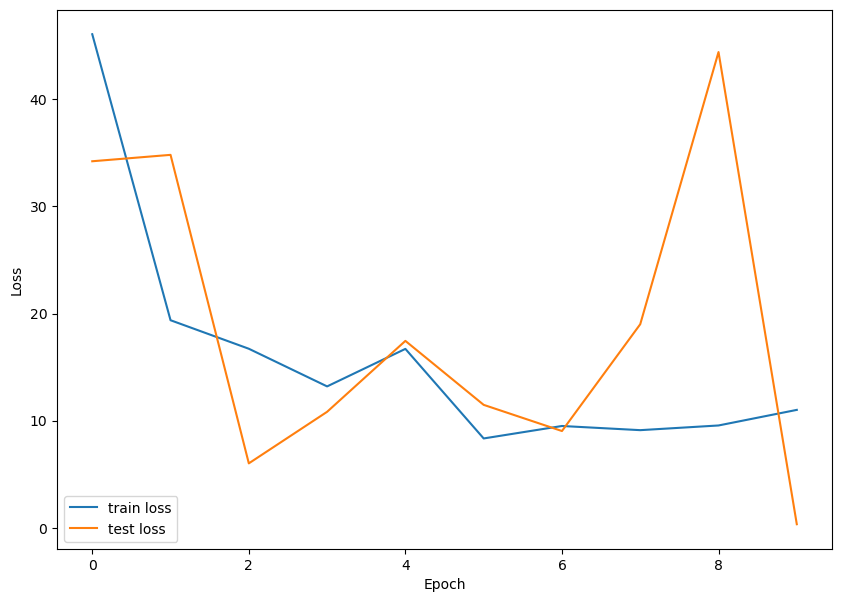

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:

model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.3359 - mse: 0.3359


[0.33594900369644165, 0.33594900369644165]